In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('credit_card_transactions.csv')

In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0,22844.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611166 entries, 0 to 611165
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             611166 non-null  int64  
 1   trans_date_trans_time  611166 non-null  object 
 2   cc_num                 611166 non-null  int64  
 3   merchant               611166 non-null  object 
 4   category               611166 non-null  object 
 5   amt                    611166 non-null  float64
 6   first                  611166 non-null  object 
 7   last                   611166 non-null  object 
 8   gender                 611166 non-null  object 
 9   street                 611166 non-null  object 
 10  city                   611165 non-null  object 
 11  state                  611165 non-null  object 
 12  zip                    611165 non-null  float64
 13  lat                    611165 non-null  float64
 14  long                   611165 non-nu

In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


In [9]:
print(df.groupby('is_fraud')['merch_zipcode'].nunique())

is_fraud
0.0    27789
1.0     2703
Name: merch_zipcode, dtype: int64


In [10]:
fraud_zipcodes = df.groupby('merch_zipcode')['is_fraud'].mean().sort_values(ascending=False)
print(fraud_zipcodes.head(10))  # Top 10 zip codes with highest fraud rates

merch_zipcode
99115.0    1.0
97884.0    1.0
60504.0    1.0
56518.0    1.0
56527.0    1.0
58416.0    1.0
77009.0    1.0
97845.0    1.0
97819.0    1.0
11967.0    1.0
Name: is_fraud, dtype: float64


In [11]:
from sklearn.impute import KNNImputer

# Filter rows where 'merch_zipcode' is missing
missing_zip_rows = df[df['merch_zipcode'].isnull()]

# Take a sample of 50,000 rows for faster computation
sample_df = df.sample(n=50000, random_state=42)

# Combine missing rows with sample
knn_df = pd.concat([sample_df, missing_zip_rows])

# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=3)  # Reduce neighbors to 3 for speed
knn_imputed = knn_imputer.fit_transform(knn_df[['merch_lat', 'merch_long', 'merch_zipcode']])

# Assign back only the missing values
df.loc[df['merch_zipcode'].isnull(), 'merch_zipcode'] = knn_imputed[-len(missing_zip_rows):, 2]

# Check if missing values are gone
print(df['merch_zipcode'].isnull().sum())  # Should print 0


0


In [12]:
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0,28705.000000
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0,99111.666667
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0,83236.000000


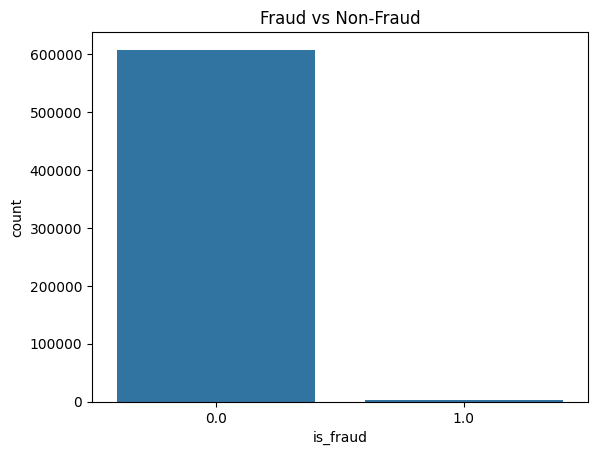

In [13]:
sns.countplot(x=df['is_fraud'])
plt.title("Fraud vs Non-Fraud")
plt.show()

In [14]:
print(df['is_fraud'].value_counts(normalize=True) * 100)

is_fraud
0.0    99.412597
1.0     0.587403
Name: proportion, dtype: float64


In [15]:
# First, handle 'trans_date_trans_time' (assuming this column has full dates)
if 'trans_date_trans_time' in df.columns:
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time']).astype(int) / 10**9

# For 'dob', handle cases where there might be just a year or incomplete dates
if 'dob' in df.columns:
    df['dob'] = pd.to_datetime(df['dob'], errors='coerce')
    df['dob'] = pd.to_datetime(df['dob'], format='%Y', errors='coerce')

    # Convert to timestamp (if valid)
    df['dob'] = df['dob'].astype(int) / 10**9


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611166 entries, 0 to 611165
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             611166 non-null  int64  
 1   trans_date_trans_time  611166 non-null  float64
 2   cc_num                 611166 non-null  int64  
 3   merchant               611166 non-null  object 
 4   category               611166 non-null  object 
 5   amt                    611166 non-null  float64
 6   first                  611166 non-null  object 
 7   last                   611166 non-null  object 
 8   gender                 611166 non-null  object 
 9   street                 611166 non-null  object 
 10  city                   611165 non-null  object 
 11  state                  611165 non-null  object 
 12  zip                    611165 non-null  float64
 13  lat                    611165 non-null  float64
 14  long                   611165 non-nu

In [17]:
df['gender'].value_counts()

,count
gender,
F,334056
M,277110


In [18]:
from sklearn.preprocessing import LabelEncoder
import joblib

label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])

# Save the encoder
joblib.dump(label_encoder, 'label_encoder_gender.pkl')

['label_encoder_gender.pkl']

In [19]:
df.drop(columns=['gender'], inplace=True)

In [20]:
df = df.drop(['Unnamed: 0', 'first', 'last', 'trans_num'], axis=1)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611166 entries, 0 to 611165
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  611166 non-null  float64
 1   cc_num                 611166 non-null  int64  
 2   merchant               611166 non-null  object 
 3   category               611166 non-null  object 
 4   amt                    611166 non-null  float64
 5   street                 611166 non-null  object 
 6   city                   611165 non-null  object 
 7   state                  611165 non-null  object 
 8   zip                    611165 non-null  float64
 9   lat                    611165 non-null  float64
 10  long                   611165 non-null  float64
 11  city_pop               611165 non-null  float64
 12  job                    611165 non-null  object 
 13  dob                    611166 non-null  float64
 14  unix_time              611165 non-nu

In [22]:
import pickle

df['merchant_encoded'] = df['merchant'].map(df['merchant'].value_counts())
df['city_encoded'] = df['city'].map(df['city'].value_counts())
df['street_encoded'] = df['street'].map(df['street'].value_counts())
df['state_encoded'] = df['state'].map(df['state'].value_counts())
df['job_encoded'] = df['job'].map(df['job'].value_counts())

category_mean = df.groupby('category')['is_fraud'].mean()
df['category_encoded'] = df['category'].map(category_mean)



# Save the frequency-encoded mappings
merchant_mapping = df['merchant'].value_counts().to_dict()
city_mapping = df['city'].value_counts().to_dict()
street_mapping = df['street'].value_counts().to_dict()
state_mapping = df['state'].value_counts().to_dict()
job_mapping = df['job'].value_counts().to_dict()

# Save the category mean encoding
category_mean_mapping = df.groupby('category')['is_fraud'].mean().to_dict()


with open('merchant_mapping.pkl', 'wb') as f:
    pickle.dump(merchant_mapping, f)

with open('city_mapping.pkl', 'wb') as f:
    pickle.dump(city_mapping, f)

with open('street_mapping.pkl', 'wb') as f:
    pickle.dump(street_mapping, f)

with open('state_mapping.pkl', 'wb') as f:
    pickle.dump(state_mapping, f)

with open('job_mapping.pkl', 'wb') as f:
    pickle.dump(job_mapping, f)

with open('category_mean_mapping.pkl', 'wb') as f:
    pickle.dump(category_mean_mapping, f)


In [23]:
df = df.drop(['merchant', 'city', 'street', 'state', 'job', 'category'], axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611166 entries, 0 to 611165
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  611166 non-null  float64
 1   cc_num                 611166 non-null  int64  
 2   amt                    611166 non-null  float64
 3   zip                    611165 non-null  float64
 4   lat                    611165 non-null  float64
 5   long                   611165 non-null  float64
 6   city_pop               611165 non-null  float64
 7   dob                    611166 non-null  float64
 8   unix_time              611165 non-null  float64
 9   merch_lat              611165 non-null  float64
 10  merch_long             611165 non-null  float64
 11  is_fraud               611165 non-null  float64
 12  merch_zipcode          611166 non-null  float64
 13  gender_encoded         611166 non-null  int64  
 14  merchant_encoded       611166 non-nu

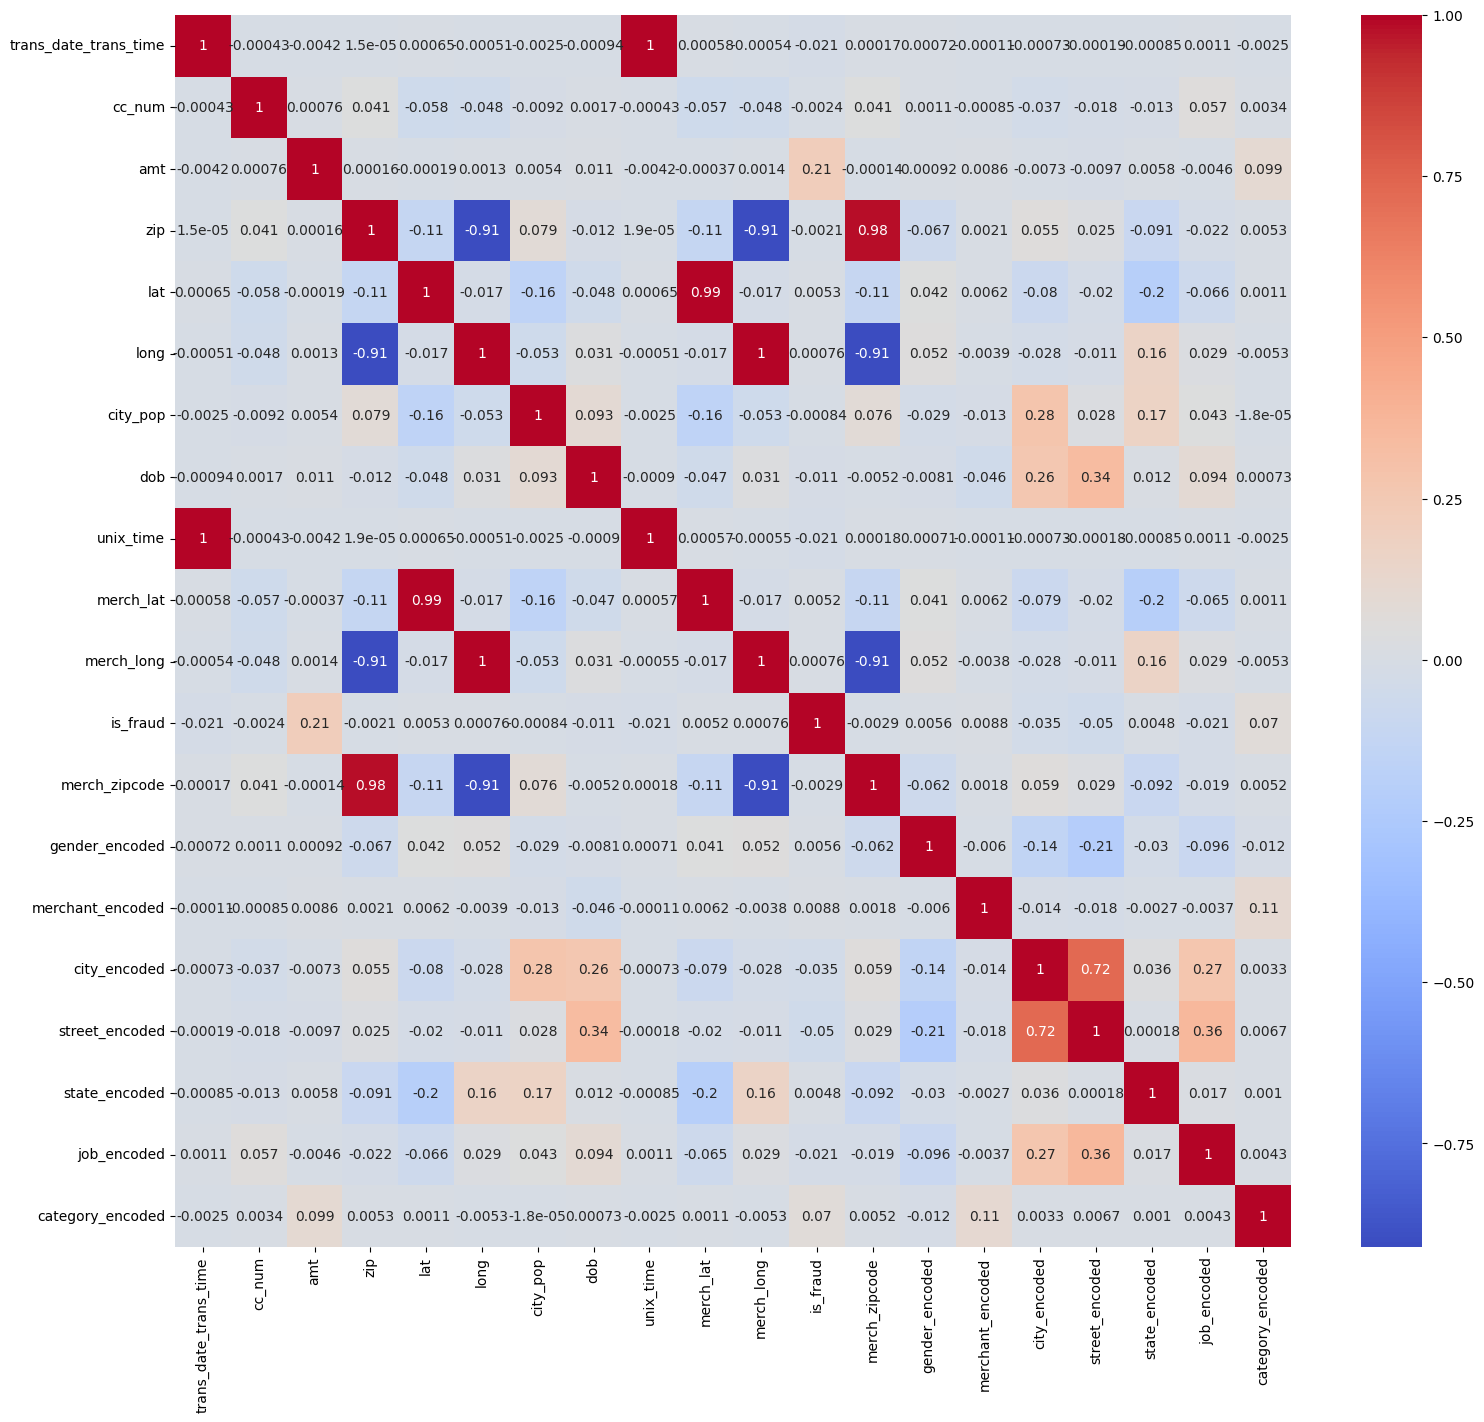

In [25]:
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

In [26]:
# drop unix_time, merch_zip, merch_lat, merch_long
df = df.drop(['unix_time', 'merch_zipcode', 'merch_lat', 'merch_long'], axis=1)

In [27]:
# Convert 'trans_date_trans_time' to datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], unit='s')

# Now extract the hour, day of week, and month
df['hour'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek
df['month'] = df['trans_date_trans_time'].dt.month

In [28]:
 # Log transformation to reduce skewness
df['log_amt'] = np.log1p(df['amt'])

In [38]:
df = df.dropna()
new_df = df.copy()

In [39]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X, y = new_df.drop(['is_fraud'], axis=1), new_df['is_fraud']

if 'trans_date_trans_time' in X.columns:
    X['trans_date_trans_time'] = pd.to_datetime(X['trans_date_trans_time']).astype(int) / 10**9

X_resampled, y_resampled = smote.fit_resample(X, y)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [41]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = xgb_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1-Score: {f1_score(y_test, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred)}")

Accuracy: 0.9989672056947702
Precision: 0.9986912718532908
Recall: 0.999242330656784
F1-Score: 0.9989667252600682
ROC-AUC: 0.9989674093150701


In [43]:
from sklearn.metrics import accuracy_score

y_train_pred = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy}")


Train Accuracy: 0.9991791136896679


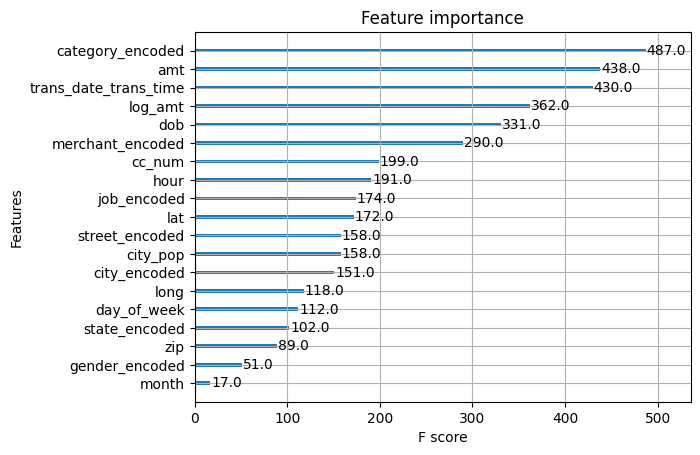

In [44]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(xgb_model, importance_type='weight')  # Shows most used features
plt.show()


In [45]:
sample_fraud = X_test[y_test == 1].sample(5)  # Random fraud cases
sample_legit = X_test[y_test == 0].sample(5)  # Random non-fraud cases

print("Fraud Cases Prediction:", xgb_model.predict(sample_fraud))
print("Legit Cases Prediction:", xgb_model.predict(sample_legit))


Fraud Cases Prediction: [1 1 1 1 1]
Legit Cases Prediction: [0 0 0 0 0]


In [46]:
import joblib
joblib.dump(xgb_model, "fraud_detection_xgb.pkl")

['fraud_detection_xgb.pkl']

In [47]:
from google.colab import files
files.download("fraud_detection_xgb.pkl")
files.download("label_encoder_gender.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
from google.colab import files

# List of files to download
pickle_files = [
    'merchant_mapping.pkl',
    'city_mapping.pkl',
    'street_mapping.pkl',
    'state_mapping.pkl',
    'job_mapping.pkl',
    'category_mean_mapping.pkl'
]

# Download each file
for file in pickle_files:
    files.download(file)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
import pickle
import numpy as np
import pandas as pd

# Load the trained model
with open('fraud_detection_xgb.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

# Load the label encoder for 'gender'
with open('label_encoder_gender.pkl', 'rb') as le_gender_file:
    label_encoder = pickle.load(le_gender_file)

# Load the saved mappings
with open('merchant_mapping.pkl', 'rb') as f:
    merchant_mapping = pickle.load(f)

with open('city_mapping.pkl', 'rb') as f:
    city_mapping = pickle.load(f)

with open('street_mapping.pkl', 'rb') as f:
    street_mapping = pickle.load(f)

with open('state_mapping.pkl', 'rb') as f:
    state_mapping = pickle.load(f)

with open('job_mapping.pkl', 'rb') as f:
    job_mapping = pickle.load(f)

with open('category_mean_mapping.pkl', 'rb') as f:
    category_mean_mapping = pickle.load(f)

In [52]:
from sklearn.preprocessing import LabelEncoder

# Modify custom input dictionary to make the transaction appear suspicious
custom_data = {
    "trans_date_trans_time": "2023-06-01 03:30:00",  # Odd time (early morning)
    "cc_num": 9876543210123456,  # Change the cc_num to a new number (could be randomly generated or anomalous)
    "amt": 5000.75,  # A high amount (fraudulent transactions often have larger amounts)
    "zip": 10001,  # Zip code can stay the same
    "lat": 37.7749,  # Change location (to a distant city like San Francisco, assuming model trained on NYC)
    "long": -122.4194,
    "city_pop": 870000,  # Change population (to another location with fewer residents, can be unusual)
    "dob": "1995-05-15",  # Same age (but could also modify age, e.g., making it look younger or older than typical)
    "gender": "F",  # No change here
    "merchant": "Unusual Merchant",  # Use an uncommon merchant or one not seen in training
    "city": "San Francisco",  # Different city
    "street": "Unknown St",  # Use a fake or unknown street name
    "state": "CA",  # Different state
    "job": "Unknown",  # Use an ambiguous or rare job type
    "category": "electronics"  # Unusual category (e.g., electronics could be flagged as high-value and risky)
}

# Create a DataFrame with the modified data
custom_df = pd.DataFrame([custom_data])

# Convert 'trans_date_trans_time' to Unix timestamp
custom_df['trans_date_trans_time'] = pd.to_datetime(custom_df['trans_date_trans_time']).astype(int) / 10**9

# Convert 'dob' to age
custom_df['dob'] = pd.to_datetime(custom_df['dob'])
custom_df['dob'] = (pd.Timestamp.now() - custom_df['dob']).dt.days // 365

# Frequency encoding for custom input
custom_df['merchant_encoded'] = custom_df['merchant'].map(merchant_mapping).fillna(0)
custom_df['city_encoded'] = custom_df['city'].map(city_mapping).fillna(0)
custom_df['street_encoded'] = custom_df['street'].map(street_mapping).fillna(0)
custom_df['state_encoded'] = custom_df['state'].map(state_mapping).fillna(0)
custom_df['job_encoded'] = custom_df['job'].map(job_mapping).fillna(0)

# Mean encoding for 'category'
custom_df['category_encoded'] = custom_df['category'].map(category_mean_mapping).fillna(0)

# Encode 'gender' using LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(['M', 'F'])
custom_df['gender_encoded'] = label_encoder.transform(custom_df['gender'])

# Extract hour, day of week, and month from 'trans_date_trans_time'
custom_df['hour'] = pd.to_datetime(custom_df['trans_date_trans_time'], unit='s').dt.hour
custom_df['day_of_week'] = pd.to_datetime(custom_df['trans_date_trans_time'], unit='s').dt.dayofweek
custom_df['month'] = pd.to_datetime(custom_df['trans_date_trans_time'], unit='s').dt.month

# Log transformation of 'amt' to normalize the range
custom_df['log_amt'] = np.log(custom_df['amt'] + 1)  # Avoid log(0)

# Drop unnecessary columns after encoding
custom_df.drop(['merchant', 'category', 'city', 'street', 'state', 'job', 'gender'], axis=1, inplace=True)

# Reorder columns to match training data
feature_cols = [
    'trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'dob',
    'gender_encoded', 'merchant_encoded', 'city_encoded', 'street_encoded',
    'state_encoded', 'job_encoded', 'category_encoded', 'hour', 'day_of_week', 'month', 'log_amt'
]

# Select columns in the correct order
custom_df = custom_df[feature_cols]

In [53]:
# Get prediction from the model
prediction = model.predict(custom_df)

# Check if it is fraud or not
result = "Fraud" if prediction[0] == 1 else "Not Fraud"

print(f"Prediction Result: {result}")


Prediction Result: Fraud
